data.shape(108, 6)
                         timestamp  sim1 (psi)  sim2 (lbs)  sim3 (in)   
0 2023-04-23 16:26:50.826000-07:00      0.0365      1.0351     2.0346  \
1 2023-04-23 16:26:51.841000-07:00      0.7872      1.7579     2.7452   
2 2023-04-23 16:26:52.941000-07:00      1.2143      2.2177     3.1999   
3 2023-04-23 16:26:54.042000-07:00      1.4384      2.5271     3.5179   
4 2023-04-23 16:26:55.140000-07:00      1.6020      2.7427     3.7562   

   sim4 (in)  sim5 (V)  
0     3.0344    4.0343  
1     3.7386    4.7345  
2     4.1883    5.1807  
3     4.5053    5.4956  
4     4.7476    5.7379  


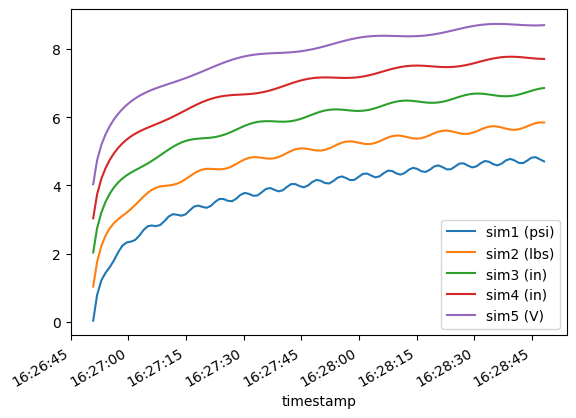

In [26]:
import pandas as pd  # https://pandas.pydata.org/pandas-docs/stable/reference/index.html

const_nrows_header_line = 1

nrows_front_matter = 1
sensor_count = 5

data = pd.read_csv(
    "..\\data_log.csv",
    header=nrows_front_matter + const_nrows_header_line + sensor_count,
    parse_dates=["timestamp"],
)
print(f"data.shape{data.shape}")
print(data.head())
axes = data.plot.line(x="timestamp")

In [27]:
sensor_traits = pd.read_csv(
    "..\\data_log.csv",
    header=nrows_front_matter,
    nrows=sensor_count,
)
print(f"sensor_traits.shape{sensor_traits.shape}")
print(sensor_traits.head())

sensor_traits.shape(5, 4)
         name  Vex   CF   X0
0  sim1 (psi)  1.0  1.0  0.0
1  sim2 (lbs)  1.0  1.0  0.0
2   sim3 (in)  1.0  1.0  0.0
3   sim4 (in)  1.0  1.0  0.0
4    sim5 (V)  1.0  1.0  0.0
